In [37]:
# loading all needed packages
# the code here is mostly taken from original work https://github.com/chervov/MSTvsET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.decomposition._pca as pca
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree

In [38]:
# loading single cell transcriptomic dataset
# bi-potential hepatoblasts cells are differentiated into hepatocytes and cholangiocytes in different timestamps

# in-vivo Mouse Liver Hepatoblast (GSE90047):
# citation: Yang, L.; Wang, W.H.; Qiu, W.L.; Guo, Z.; Bi, E.; Xu, C.R. A single-cell transcriptomic analysis reveals 
# precise pathways and regulatory mechanisms underlying hepatoblast differentiation. Hepatology 2017, 66, 1387–1401

# number of cells (rows): 447, genes (columns): 24748. timestamps are recorded as row names

df = pd.read_csv("/Users/amirmanzour/Documents/projects/scRNA/data/archive/GSE90047_Mouse_Liver_Hepatoblast_invivo.csv", index_col=0)
df.shape

(447, 24748)

In [39]:
# retrieving timestamps for each cell
y = [float(df.index[i][1:5]) for i in range(len(df.index)) ]
y = np.array(y)
pd.Series(y).value_counts()

15.5    77
11.5    70
14.5    70
17.5    70
13.5    65
10.5    54
12.5    41
dtype: int64

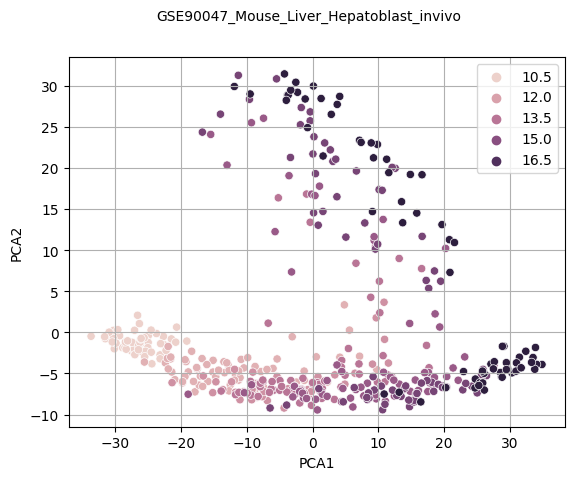

In [43]:
# visualization of cells using their first two princiapal components and coloring them according to their timestamps
reduce = pca.PCA() # reduce will keep the transformation function of PCA
data2 = reduce.fit_transform(df)

fig = plt.figure()
plt.suptitle('GSE90047_Mouse_Liver_Hepatoblast_invivo',fontsize = 10)
sns.scatterplot(x = data2[:,0],y = data2[:,1], hue=y)
plt.grid()
plt.xlabel('PCA1',fontsize = 10)
plt.ylabel('PCA2',fontsize = 10)
plt.show()

In [46]:
# clustering cells based on their gene expression profiles
df_array = df.to_numpy()
cluster_num = 9 # the choice is based on original work 

clustering = KMeans(n_clusters=cluster_num, random_state=0).fit(df_array)
predicted_clusters = clustering.labels_ # cluster labels for corresponding cells
cluster_centers = clustering.cluster_centers_
cluster_centers.shape

(9, 24748)

In [47]:
# building a minimum spanning tree (mst) from the fully-connected graph of cluster centers
csr_knn = kneighbors_graph(cluster_centers, n_neighbors= cluster_num, mode= 'distance', include_self=True)
csr_mst = minimum_spanning_tree(csr_knn)
csr_mst.toarray()           

array([[ 0.        , 12.87044256,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 16.91201699],
       [21.79364817,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 15.0616436 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 19.30162586,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 19.0037168 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [11.86625227,  0.        ,  0.        ,  0.        ,  0

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


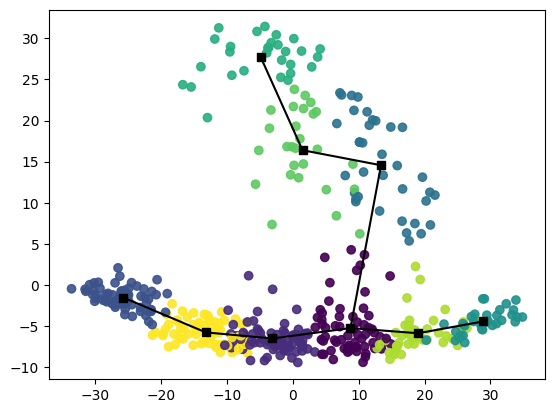

In [50]:
#visualization of the mst

# visualization of cells using their first two princiapal components and coloring them according to their clusters
plt.scatter(data2[:,0], data2[:,1], c = predicted_clusters, alpha = 0.9)

# PCA transformation of cluster centers 
cluster_centers_2 = reduce.transform(cluster_centers)
plt.scatter(cluster_centers_2[:,0],cluster_centers_2[:,1],c = 'black', marker = "s")

# plotting the edges of the mst graph
for i in range(csr_mst.shape[0]):
    for j in range(csr_mst.shape[1]):
        if csr_mst[i,j] != 0:
            plt.plot([cluster_centers_2[i,0], cluster_centers_2[j,0]], [cluster_centers_2[i,1], cluster_centers_2[j,1]], c='black') # 'black')


In [ ]:
# mst roughly represents trajectory of cell differentiation (previous plot)